Hola **Edgar**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>


# PROYECTO SPRINT 11

## Paso 1. Abrir el archivo de datos y leer la información general

### 1.1 Importación de librerías, carga y visualización de datos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math as mth
from math import factorial
from scipy import stats as st

In [2]:
logs = pd.read_csv('/datasets/logs_exp_us.csv', sep = '	')
logs.info()
print()
print(logs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


## Paso 2. Preparar los datos para el análisis
- Cambia el nombre de las columnas de manera que sea conveniente para ti.
- Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.
- Agrega una columna de fecha y hora y una columna separada para las fechas.

In [3]:
logs_column_names = {'EventName':'event_name', 'DeviceIDHash':'device_id_hash', 'EventTimestamp':'event_time_stamp', 'ExpId':'exp_id'}
logs.rename(columns = logs_column_names, inplace = True)
logs['device_id_hash'] = logs['device_id_hash'].astype('str')
logs['event_time_stamp'] = pd.to_datetime(logs['event_time_stamp'], unit='s')
logs.info()
print()
logs['event_time_stamp'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_name        244126 non-null  object        
 1   device_id_hash    244126 non-null  object        
 2   event_time_stamp  244126 non-null  datetime64[ns]
 3   exp_id            244126 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.5+ MB



0   2019-07-25 04:43:36
1   2019-07-25 11:11:42
2   2019-07-25 11:28:47
3   2019-07-25 11:28:47
4   2019-07-25 11:48:42
Name: event_time_stamp, dtype: datetime64[ns]

In [4]:
logs['event_date'] = logs['event_time_stamp'].dt.date
logs['event_date'] = pd.to_datetime(logs['event_date'], format = '%Y-%m-%d')
logs['event_time'] = logs['event_time_stamp'].dt.time
logs.info()
print()
logs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_name        244126 non-null  object        
 1   device_id_hash    244126 non-null  object        
 2   event_time_stamp  244126 non-null  datetime64[ns]
 3   exp_id            244126 non-null  int64         
 4   event_date        244126 non-null  datetime64[ns]
 5   event_time        244126 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 11.2+ MB



,event_name,device_id_hash,event_time_stamp,exp_id,event_date,event_time
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecha la revisión inicial de los datos para tu análisis, siempre es importante revisar la calidad de tus datos y realizar las transformaciones necesarias 
</div>

## Paso 3. Estudiar y comprobar los datos

### 3.1. ¿Cuántos eventos hay en los registros?

In [5]:
total_eventos = len(logs)
print('La cantidad de eventos que hay en los registros es:', total_eventos)

La cantidad de eventos que hay en los registros es: 244126


### 3.2. ¿Cuántos usuarios hay en los registros?

In [6]:
usuarios_únicos = logs['device_id_hash'].nunique()
print('El número de usuarios únicos en los registros es:', usuarios_únicos)

El número de usuarios únicos en los registros es: 7551


### 3.3. ¿Cuál es el promedio de eventos por usuario?

In [7]:
promedio_eventos_usuario = total_eventos / usuarios_únicos
print(f'El promedio de eventos por usuario es: {promedio_eventos_usuario:.0f}')

El promedio de eventos por usuario es: 32


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, aquí cómo recomendación para que le des un plus a tu análisis, es que este tipo de métricas cómo la del promedio de eventos de abajo las calcules por cada grupo cuando se trate de pruebas AB ya que así se puede ir viendo las diferencias desde el inicio.
</div>

### 3.4.1. ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora.

In [8]:
fecha_minima = logs['event_date'].min()
fecha_maxima = logs['event_date'].max()

print(f"El periodo de tiempo que cubren los datos es desde {fecha_minima.date()} hasta {fecha_maxima.date()}.")

El periodo de tiempo que cubren los datos es desde 2019-07-25 hasta 2019-08-07.


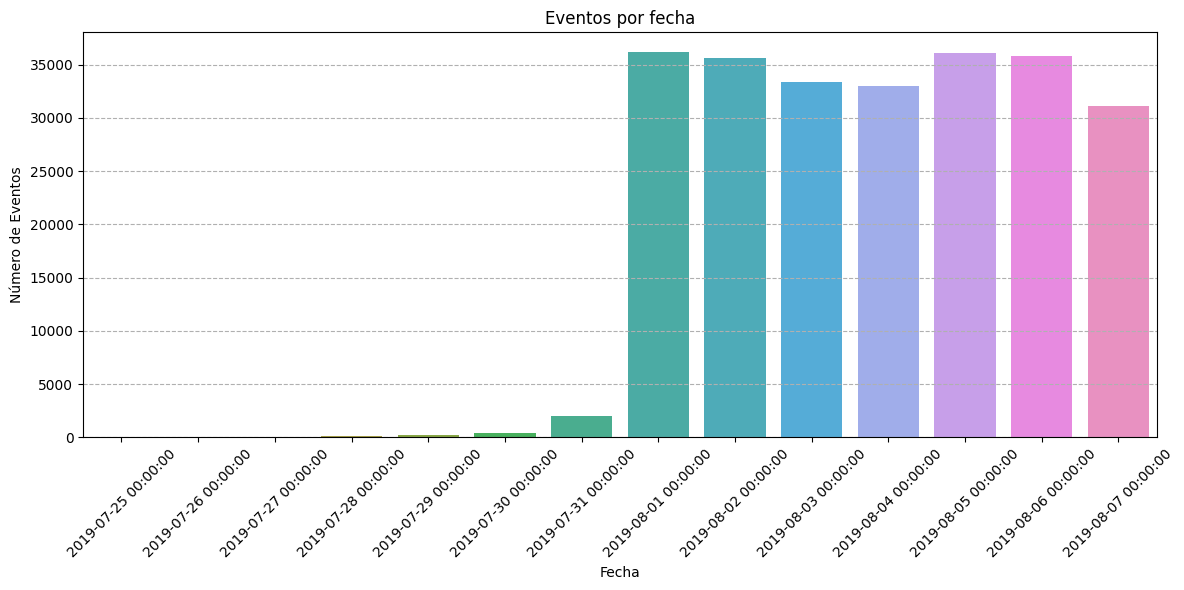

In [9]:
eventos_por_fecha = logs['event_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=eventos_por_fecha.index, y=eventos_por_fecha.values)
plt.title('Eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

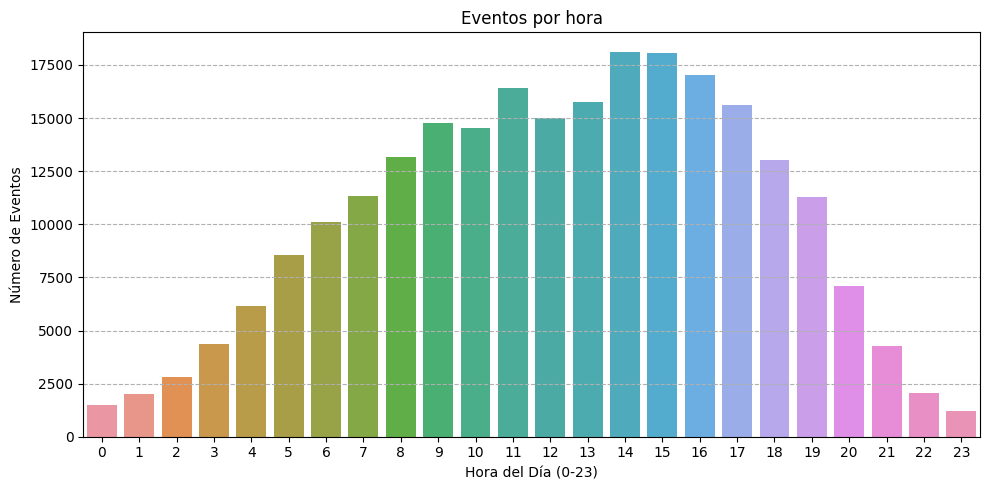

In [10]:
logs['event_hour'] = logs['event_time_stamp'].dt.hour

eventos_por_hora = logs['event_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=eventos_por_hora.index, y=eventos_por_hora.values)
plt.title('Eventos por hora')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Número de Eventos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### 3.4.2. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general.

**Respuesta:** Se determina visualmente la fecha en que los datos comienzan a estar completos y se vuelven a crear los gráficos.

### Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [11]:
fecha_corte = '2019-08-01'
logs_corte = logs[logs['event_date'] >= pd.to_datetime(fecha_corte)]

fecha_mínima_filtrada = logs_corte['event_date'].min()

print(f"Los datos realmente representan un periodo desde {fecha_mínima_filtrada.date()} hasta {fecha_maxima.date()}.")

Los datos realmente representan un periodo desde 2019-08-01 hasta 2019-08-07.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado! De esta forma las muestras que quedan son más consistentes y se evita incluir datos de fechas que puedan incluir "ruido" al análisis cómo tal.
</div>

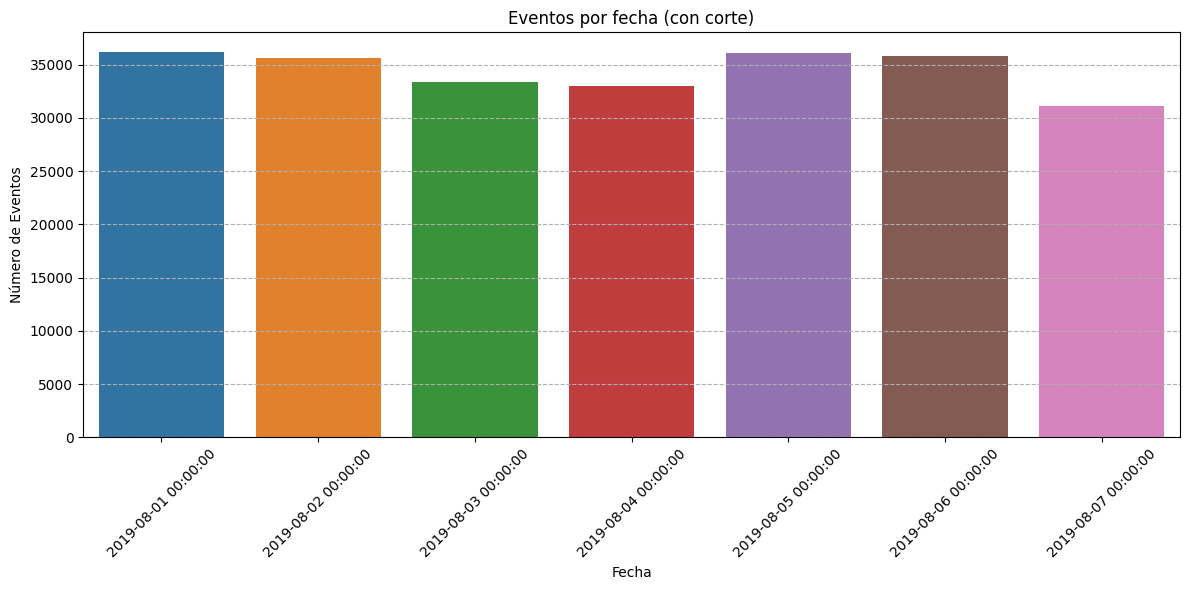

In [12]:
eventos_por_fecha_corte = logs_corte['event_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=eventos_por_fecha_corte.index, y=eventos_por_fecha_corte.values)
plt.title('Eventos por fecha (con corte)')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

/tmp/ipykernel_844/961646253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs_corte['event_hour'] = logs_corte['event_time_stamp'].dt.hour


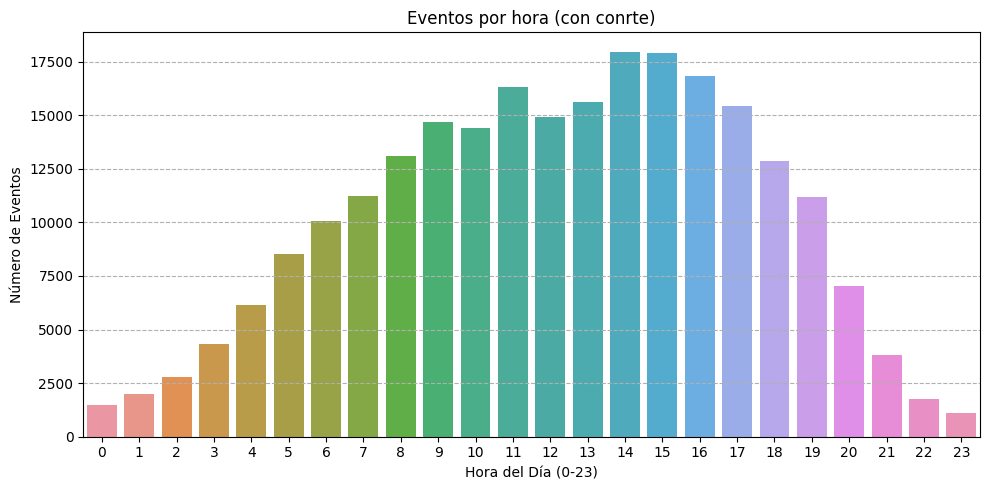

In [13]:
logs_corte['event_hour'] = logs_corte['event_time_stamp'].dt.hour

eventos_por_hora_corte = logs_corte['event_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=eventos_por_hora_corte.index, y=eventos_por_hora_corte.values)
plt.title('Eventos por hora (con conrte)')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Número de Eventos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### 3.5. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [14]:
total_eventos_ = len(logs)
total_usuarios = logs['device_id_hash'].nunique()

total_eventos_corte = len(logs_corte)
total_usuarios_corte = logs_corte['device_id_hash'].nunique()

eventos_perdidos = ((total_eventos - total_eventos_corte) / total_eventos) * 100
usuarios_perdidos = ((total_usuarios - total_usuarios_corte) / total_usuarios) * 100

print(f'Se perdió el {eventos_perdidos:.2f}% de eventos')
print(f'Se perdió el {usuarios_perdidos:.2f}% de usuarios')

Se perdió el 1.16% de eventos
Se perdió el 0.23% de usuarios


**Respuesta:** No, por el contrario, se perdieron porcentajes bastante bajos tanto de eventos y usuarios.

### 3.6. Asegúrate de tener usuarios de los tres grupos experimentales.

In [15]:
grupos = logs_corte['exp_id'].unique()

print(f"Los grupos experimentales de mis datos son: {grupos}")
print(f"Número de grupos: {len(grupos)}")

Los grupos experimentales de mis datos son: [246 247 248]
Número de grupos: 3


## Paso 4. Estudiar el embudo de eventos

### 4.1. Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [16]:
frec_eventos = logs_corte['event_name'].value_counts()

print("Frecuencia de eventos descendente:")
print(frec_eventos)

Frecuencia de eventos descendente:
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


### 4.2. Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [17]:
usuarios_por_evento = logs_corte.groupby('event_name')['device_id_hash'].nunique().reset_index()
usuarios_por_evento['proportion'] = usuarios_por_evento['device_id_hash'] / total_usuarios # ya estaba definida esta variable

embudo_eventos = usuarios_por_evento.sort_values(by='device_id_hash', ascending=False)

print("Embudo de eventos por usuario:")
print(embudo_eventos)

Embudo de eventos por usuario:
                event_name  device_id_hash  proportion
1         MainScreenAppear            7419    0.982519
2       OffersScreenAppear            4593    0.608264
0         CartScreenAppear            3734    0.494504
3  PaymentScreenSuccessful            3539    0.468680
4                 Tutorial             840    0.111244


### 4.3. ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

**Respuesta:** Muy probablemente ocurren en el mismo órden que cuando calculamos la frecuencia de eventos en orden descendente excepto para el tutorial, dado que este puede ocurrir en segundo, tercero, cuarto, quinto lugar, es decir en cualquier parte del proceso después de que aparezca la pantalla principal, o simplemente no ocurrir. El tutorial probablemente solo se visualice cuando el usuario tenga alguna duda y requiera verlo, incluso si el tutorial aparece justo después de la pantalla principal, es común que los tutotiales suelan saltarse.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho los cálculos de las conversiones! Al tratarse de una prueba AB puedes dejar el análisis por cada grupo y dejarlo en una visualización para que la comparación sea más visual, pero en si el cálculo fue el correcto!
</div>

### 4.4. Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [18]:
sec_embudo = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

embudo_eventos_sec = embudo_eventos[embudo_eventos['event_name'].isin(sec_embudo)]

embudo_eventos_sec['event_name'] = pd.Categorical(embudo_eventos_sec['event_name'], categories=sec_embudo, ordered=True)

embudo_eventos_sec = embudo_eventos_sec.sort_values('event_name')

embudo_eventos_sec['conversion_rate'] = (embudo_eventos_sec['device_id_hash'] / embudo_eventos_sec['device_id_hash'].shift(1))

print("Análisis de la tasa de conversión del embudo:")
print(embudo_eventos_sec)

Análisis de la tasa de conversión del embudo:
                event_name  device_id_hash  proportion  conversion_rate
1         MainScreenAppear            7419    0.982519              NaN
2       OffersScreenAppear            4593    0.608264         0.619086
0         CartScreenAppear            3734    0.494504         0.812976
3  PaymentScreenSuccessful            3539    0.468680         0.947777


/tmp/ipykernel_844/1618899054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embudo_eventos_sec['event_name'] = pd.Categorical(embudo_eventos_sec['event_name'], categories=sec_embudo, ordered=True)


### 4.5. ¿En qué etapa pierdes más usuarios?

**Respuesta:** En la etapa "Main Screen Appear", dado que sólo pasa el 61.91% de los usuarios a la siguiente etapa.

### 4.6. ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [19]:
usuarios_inicio = embudo_eventos.loc[embudo_eventos['event_name'] == 'MainScreenAppear', 'device_id_hash'].iloc[0]

usuarios_pago = embudo_eventos.loc[embudo_eventos['event_name'] == 'PaymentScreenSuccessful', 'device_id_hash'].iloc[0]

conversion_total = (usuarios_pago / usuarios_inicio) * 100

print(f"El porcentaje de usuarios que hizo todo el viaje es: {conversion_total:.2f}%")

El porcentaje de usuarios que hizo todo el viaje es: 47.70%


## Paso 5. Estudiar los resultados del experimento

### 5.1. ¿Cuántos usuarios hay en cada grupo?

In [20]:
usuarios_grupo = logs_corte['exp_id'].value_counts()
print(usuarios_grupo)

248    84726
246    79425
247    77147
Name: exp_id, dtype: int64


### 5.2. Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [21]:
from scipy.stats import norm

grupo_246 = logs_corte[logs_corte['exp_id'] == 246]
grupo_247 = logs_corte[logs_corte['exp_id'] == 247]

trials_246 = grupo_246['device_id_hash'].nunique()
trials_247 = grupo_247['device_id_hash'].nunique()

successes_246 = grupo_246[grupo_246['event_name'] == 'MainScreenAppear']['device_id_hash'].nunique()
successes_247 = grupo_247[grupo_247['event_name'] == 'MainScreenAppear']['device_id_hash'].nunique()

proporción_246 = successes_246 / trials_246
proporción_247 = successes_247 / trials_247

proporción_combinada = (successes_246 + successes_247) / (trials_246 + trials_247)

std_error = mth.sqrt(proporción_combinada * (1 - proporción_combinada) * (1/trials_246 + 1/trials_247))

valor_z = (proporción_246 - proporción_247) / std_error

valor_p = 2 * (1 - norm.cdf(abs(valor_z)))

print(f"Estadístico z: {valor_z:.4f}")
print(f"Valor p: {valor_p:.4f}")

if valor_p < 0.05:
    print("Conclusión: Existe una diferencia estadísticamente significativa. La prueba A/A no pasó.")
else:
    print("Conclusión: No hay una diferencia estadísticamente significativa. La prueba A/A pasó con éxito.")

Estadístico z: 0.3093
Valor p: 0.7571
Conclusión: No hay una diferencia estadísticamente significativa. La prueba A/A pasó con éxito.


### 5.3. Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen avance con tu proyecto Edgar! Pero a partir de aquí hay varias celdas que no se pueden ejecutar debido a que se intenta utilizar variables que no se han definido antes. Recuerda que los notebooks se ejecutan de arriba abajo y si una variable no se definió antes causará errores en la ejecución.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta:</b> <a class=“tocSkip”></a>Se define la variable event_name = 'MainScreenAppear' para la siguiente celda.
</div>


In [22]:
from statsmodels.stats.proportion import proportions_ztest

def check_aa_test(event_name, group_1_data, group_2_data, n_1, n_2):
    """
    Realiza una prueba Z para proporciones para un evento específico entre dos grupos.
    
    Args:
        event_name (str): El nombre del evento a probar.
        group_1_data (pd.DataFrame): DataFrame del Grupo 1.
        group_2_data (pd.DataFrame): DataFrame del Grupo 2.
        n_1 (int): Número total de usuarios en el Grupo 1.
        n_2 (int): Número total de usuarios en el Grupo 2.
        
    Returns:
        float: El p-valor de la prueba.
    """
    # Contar usuarios únicos que realizaron el evento en cada grupo
    k_1 = group_1_data[group_1_data['event_name'] == event_name]['device_id_hash'].nunique()
    k_2 = group_2_data[group_2_data['event_name'] == event_name]['device_id_hash'].nunique()
    
    # Realizar la prueba Z
    z_stat, p_value = proportions_ztest([k_1, k_2], [n_1, n_2])
    
    return p_value

event_name = 'MainScreenAppear'

p_value_popular = check_aa_test('event_name', grupo_246, grupo_247, trials_246, trials_247)

print(f"\n--- Prueba A/A para el evento más popular: '{event_name}' ---")
print(f"P-valor: {p_value_popular:.4f}")
if p_value_popular < 0.05:
    print("Conclusión: Diferencia significativa. La prueba A/A no pasó para este evento.")
else:
    print("Conclusión: No hay diferencia significativa. La prueba A/A pasó para este evento.")


--- Prueba A/A para el evento más popular: 'MainScreenAppear' ---
P-valor: nan
Conclusión: No hay diferencia significativa. La prueba A/A pasó para este evento.


/.venv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


In [23]:
eventos_unicos = logs_corte['event_name'].unique()

resultados_aa = {}

print("\n--- Realizando pruebas A/A para todos los eventos ---")
for event in eventos_unicos:
    p_value = check_aa_test(event, grupo_246, grupo_247, trials_246, trials_247)
    resultados_aa[event] = p_value
    
resultados_df = pd.DataFrame(resultados_aa.items(), columns=['event_name', 'p_value'])

print("\nResumen de los p-valores de la prueba A/A por evento:")
print(resultados_df)


--- Realizando pruebas A/A para todos los eventos ---

Resumen de los p-valores de la prueba A/A por evento:
                event_name   p_value
0                 Tutorial  0.937700
1         MainScreenAppear  0.757060
2       OffersScreenAppear  0.248095
3         CartScreenAppear  0.228834
4  PaymentScreenSuccessful  0.114567


### 5.4. Haz lo mismo para el grupo con fuentes alteradas (grupo de prueba). Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?


<div class="alert alert-block alert-info">
<b>Respuesta:</b> <a class=“tocSkip”></a>Se corrige el código para la siguiente celda y se maneje con la variable: "control_combinado".
</div>


In [24]:
grupo_248 = logs_corte[logs_corte['exp_id'] == 248]
control_combinado= pd.concat([grupo_246, grupo_247])
trials_248 = grupo_248['device_id_hash'].nunique()
trials_combinado = control_combinado['device_id_hash'].nunique()


<div class="alert alert-block alert-info">
<b>Respuesta:</b> <a class=“tocSkip”></a>Se corrige el código para la siguiente celda y se maneje con la variable: "control_combinado".
</div>


In [25]:
def check_ab_test(event_name, test_group_data, control_group_data, n_test, n_control):
    """
    Realiza una prueba Z para proporciones para un evento específico entre un grupo de prueba y uno de control.
    """
    successes_test = test_group_data[test_group_data['event_name'] == event_name]['device_id_hash'].nunique()
    successes_control = control_group_data[control_group_data['event_name'] == event_name]['device_id_hash'].nunique()
    
    z_stat, p_value = proportions_ztest([successes_test, successes_control], [n_test, n_control])
    
    return p_value

# Almacenar los resultados de las pruebas
resultados_vs_246 = {}
resultados_vs_247 = {}
resultados_vs_combined = {}

print("--- Realizando pruebas A/B ---")
for event in eventos_unicos:
    # Prueba A/B: Grupo 248 vs. Grupo 246
    p_value_246 = check_ab_test(event, grupo_248, grupo_246, trials_248, trials_246)
    resultados_vs_246[event] = p_value_246
    
    # Prueba A/B: Grupo 248 vs. Grupo 247
    p_value_247 = check_ab_test(event, grupo_248, grupo_246, trials_248, trials_246)
    resultados_vs_247[event] = p_value_247

    # Prueba A/B: Grupo 248 vs. Grupo de control combinado
    p_value_combined = check_ab_test(event, grupo_248, control_combinado, trials_248, trials_combinado)
    resultados_vs_combined[event] = p_value_combined

# Crear DataFrames para una mejor visualización de los resultados
df_vs_246 = pd.DataFrame(resultados_vs_246.items(), columns=['event_name', 'p_value_vs_246'])
df_vs_247 = pd.DataFrame(resultados_vs_247.items(), columns=['event_name', 'p_value_vs_247'])
df_vs_combined = pd.DataFrame(resultados_vs_combined.items(), columns=['event_name', 'p_value_vs_combined'])

# Unir los resultados en una sola tabla
resultados_finales = df_vs_246.merge(df_vs_247, on='event_name').merge(df_vs_combined, on='event_name')

print("\nResultados de las pruebas A/B (p-valores):")
print(resultados_finales)

--- Realizando pruebas A/B ---

Resultados de las pruebas A/B (p-valores):
                event_name  p_value_vs_246  p_value_vs_247  \
0                 Tutorial        0.826429        0.826429   
1         MainScreenAppear        0.294972        0.294972   
2       OffersScreenAppear        0.208362        0.208362   
3         CartScreenAppear        0.078429        0.078429   
4  PaymentScreenSuccessful        0.212255        0.212255   

   p_value_vs_combined  
0             0.764862  
1             0.294245  
2             0.434255  
3             0.181759  
4             0.600429  


**Conclusión de pruebas A/B:** Todos los p-valores son mayores que 0.05 para cada uno de los eventos analizados. No hay evidencia suficiente para concluir que el grupo de prueba (con las fuentes alteradas) se comportó de manera diferente a los grupos de control.

### 5.5. ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

**Conclusión:** Se utilizó significancia de 0.05, **si el nivel de significancia se aumenta mis resultados podrían indicar que sí hay diferencia estadística pero como falsos positivos**. Por otro lado, tampoco tiene caso que la significancia se disminuya, puesto que **mis valores p ya son mayores a mi nivel de significancia actual de 0.05** (incluso el valor p más bajo que fue de 0.078). **El nivel de significancia no se cambia.**

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Te felicito! Realizaste un muy buen análisis de los grupos de tratamiento entre los cambios obtenidos entre uno y otro respecto al funnel que el usuario debe seguir, tus conclusiones son muy acertadas y siempre argumentadas con los datos obtenidos a partir de tus cálculos. 
    
No cabe duda que vas por excelente camino para convertirte en Data Analyst, saludos!
</div>